# Parte do trabalho de Aprendizado de Maquina UFF 2020/01
Codigo fonte gerado a partir de https://github.com/priya-dwivedi/Music_Genre_Classification
Base de dados obtidos de https://github.com/mdeff/fma e https://github.com/priya-dwivedi/Music_Genre_Classification (https://os.unil.cloud.switch.ch/fma/fma_small.zip; https://drive.google.com/drive/u/0/folders/1-PTQBiz6E53uUa9LebHjds_ZQesRHEqx; https://os.unil.cloud.switch.ch/fma/fma_metadata.zip)

Esta etapa consiste em plotar mel-espectogramas de exemplares de generos de musica.

É preciso alterar a variável "filepath" para o caminho correspondente ao local onde foram baixados os metadados:
* filepath = 'C:/Users/bruno/Desktop/aprendizado_de_maquina/seminario/ML2020_dados/fma_small

Se estiver em ambiente Windows: 
* É opcional inserir a função ".replace("\\","/")" no final do comando "os.path.join" para que a função não retorno o seguinte: "C:/Users/bruno/Desktop/aprendizado de maquina/seminario/ML2020 - dados/fma_metadata/fma_small\036\036096.mp3"
* É preciso baixar o binario do runtime do ffmpeg para que o Librosa carregue o arquivos .mp3  (https://ffmpeg.org/download.html#build-windows)
    * Após baixar o ZIP, é preciso adicionar 2 diretorios às variaves de ambiente do Windows. É preciso alterar o nome do diretório para "ffmpeg" e copia-lo para a raiz do disco ("C:\ffmpeg"). É preciso acrescentar os caminhos ao Path do windows: "C:\ffmpeg\bin" e "C:\ffmpeg" 
* Caso o ffmpeg não funcione, é preciso instalar o binario do runtime do Gstreamer para que o Librosa carregue o arquivos .mp3 (https://gstreamer.freedesktop.org/download/#windows) 
    * É preciso instalar o vinculo ao python, com "pip install pygobject" executado na linha de comando (se der erro na instalação, seguir os passos para instalação no site oficial https://pygobject.readthedocs.io/en/latest/getting_started.html#windows-getting-started)

In [8]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def get_audio_path(audio_dir, track_id):
    """
    Return the path to the mp3 given the directory where the audio is stored
    and the track ID.
    Examples
    --------
    >>> import utils
    >>> AUDIO_DIR = os.environ.get('AUDIO_DIR')
    >>> utils.get_audio_path(AUDIO_DIR, 2)
    '../data/fma_small/000/000002.mp3'
    """
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')

def get_tids_from_directory(audio_dir):
    """Get track IDs from the mp3s in a directory.
    Parameters
    ----------
    audio_dir : str
        Path to the directory where the audio files are stored.
    Returns
    -------
        A list of track IDs.
    """
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files)
    return tids

In [10]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('C:/Users/bruno/Desktop/aprendizado_de_maquina/seminario/ML2020_dados/fma_small')

In [11]:
AUDIO_DIR = 'C:/Users/bruno/Desktop/aprendizado_de_maquina/seminario/ML2020_dados/fma_small'
tids = get_tids_from_directory(AUDIO_DIR)
#print(tids)

In [12]:
print(get_audio_path(AUDIO_DIR, 36096))

C:/Users/bruno/Desktop/aprendizado_de_maquina/seminario/ML2020_dados/fma_small\036\036096.mp3


### Plot single spectogram

661560 22050
(128, 1293) fma_small\036\036096


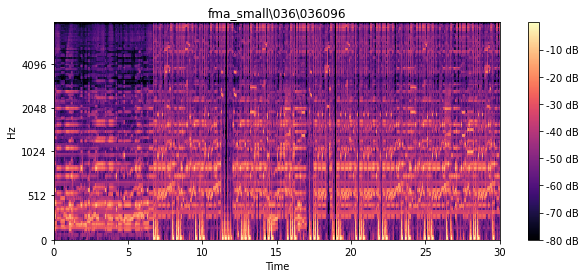

In [13]:
filename = get_audio_path(AUDIO_DIR, 36096)
y, sr = librosa.load(filename)
print(len(y),sr)
each_file = filename.split('/')[-1]
genre_name = each_file.split('.')[0]
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)
# spect = np.log(spect)
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [14]:
filepath = 'C:/Users/bruno/Desktop/aprendizado_de_maquina/seminario/ML2020_dados/fma_metadata/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top')]

df_all = tracks[keep_cols]
df_all = df_all[df_all[('set', 'subset')] == 'small']

df_all['track_id'] = df_all.index
df_all.head()

set            track track_id
             split subset genre_top         
track_id                                    
2         training  small   Hip-Hop        2
5         training  small   Hip-Hop        5
10        training  small       Pop       10
140       training  small      Folk      140
141       training  small      Folk      141

In [15]:
grouped_df = df_all.groupby(('track', 'genre_top')).first().reset_index()
grouped_df.head(10)

track         set        track_id
       genre_top       split subset         
0     Electronic    training  small     1482
1   Experimental  validation  small      148
2           Folk    training  small      140
3        Hip-Hop    training  small        2
4   Instrumental        test  small    10250
5  International    training  small      666
6            Pop    training  small       10
7           Rock        test  small      182

### Plot Spectogram for all genres

In [16]:
def create_spectogram(track_id, genre):
    filename = get_audio_path(AUDIO_DIR, track_id)
    y, sr = librosa.load(filename)
    print(len(y),sr)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
#     spect = np.log(spect)
    print(spect.shape, genre)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(genre))
    plt.show()

c:\users\bruno\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


660984 22050
(128, 646) Electronic


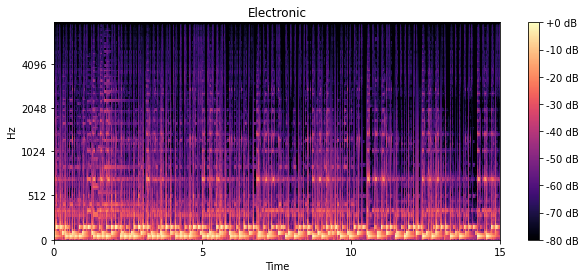

660984 22050
(128, 646) Experimental


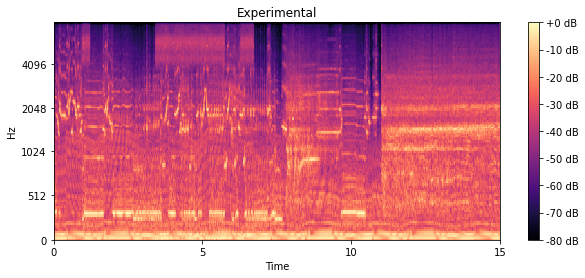

660984 22050
(128, 646) Folk


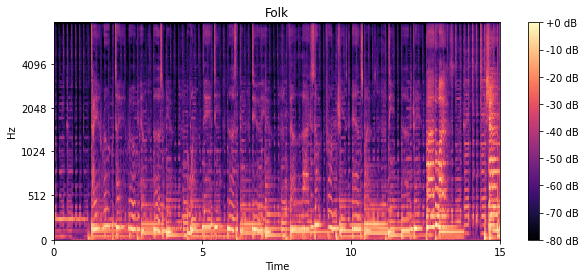

660984 22050
(128, 646) Hip-Hop


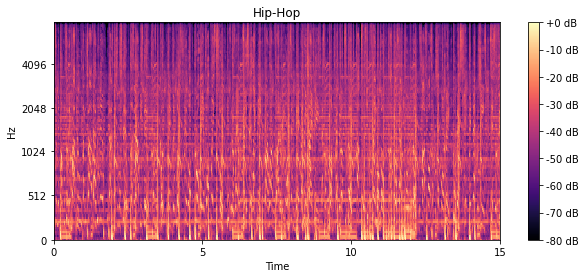

660984 22050
(128, 646) Instrumental


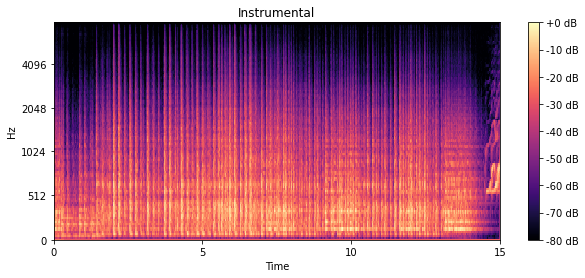

661560 22050
(128, 647) International


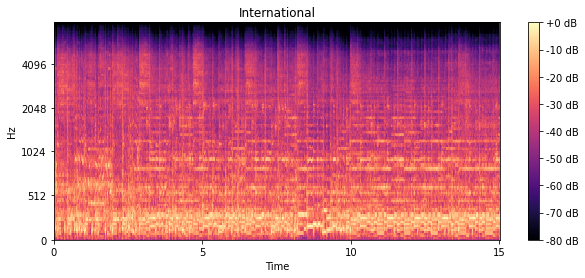

660984 22050
(128, 646) Pop


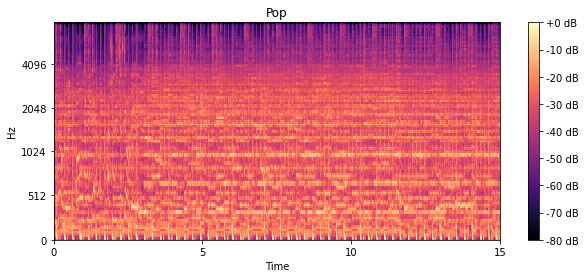

661560 22050
(128, 647) Rock


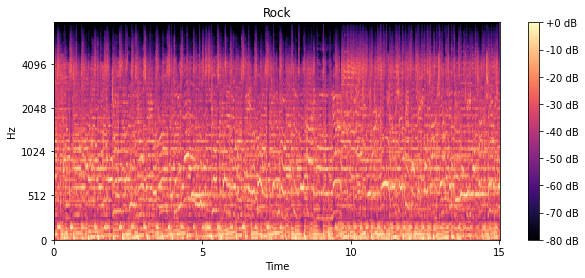

In [17]:
for index, row in grouped_df.iterrows():
    track_id = int(row['track_id'])
    genre = row[('track', 'genre_top')]
    create_spectogram(track_id, genre)